### 📦 Dataset Attribution

This project uses the **FUTURA Synthetic Invoices Dataset**, publicly available via Zenodo:

> **FUTURA - Synthetic Invoices Dataset for Document Analysis**  
> Authors: Dimosthenis Karatzas, Fei Chen, Davide Fichera, Diego Marchetti  
> License: [Creative Commons Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)  
> DOI: [https://doi.org/10.5281/zenodo.10371464](https://doi.org/10.5281/zenodo.10371464)  
> Accessed via Zenodo. Redistribution and derivative works must credit the original authors.

We gratefully acknowledge the authors for creating and releasing this dataset.

## 🔍 Inference on New Invoices

In this notebook, we demonstrate how to use the trained model to predict whether **a new invoice image** is **real** or **tampered**.

We'll walk through:

1. Loading the saved model
2. Preprocessing a new image (applying the same transforms)
3. Making a prediction
4. Interpreting the result

This is a key step toward real-world deployment or integration into a pipeline.


In [1]:
# 📦 Step 1: Load the Model for Inference
import torch
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"📦 Using device: {device}")

# Load the architecture
model = resnet18(weights=None)
model.fc = nn.Linear(model.fc.in_features, 1)  # Binary classifier
model.load_state_dict(torch.load("../outputs/resnet_invoice.pt", map_location=device))
model.to(device)
model.eval()

print("✅ Model loaded and ready for single-image inference.")


📦 Using device: cpu
✅ Model loaded and ready for single-image inference.


c:\Users\Parwaaz Joshi\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


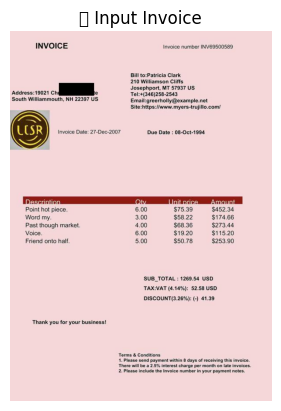

In [3]:
# 🖼️ Step 2: Define Inference Transform + Load Image
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define same transform used during evaluation
inference_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Helper to load and preprocess image
def load_invoice_image(path):
    image = Image.open(path).convert("RGB")
    transformed = inference_transform(image).unsqueeze(0)  # Add batch dim
    return image, transformed

# Example
img_path = "../data/tampered/tampered_6.jpg"
original_image, image_tensor = load_invoice_image(img_path)

# Optional: Visualize
plt.imshow(original_image)
plt.axis("off")
plt.title("🧾 Input Invoice")
plt.show()


In [4]:
# Run inference
with torch.no_grad():
    image_tensor = image_tensor.to(device)
    output = model(image_tensor)
    prob = torch.sigmoid(output).item()
    prediction = 1 if prob > 0.5 else 0

# Interpret prediction
label = "Tampered ❌" if prediction == 1 else "Real ✅"
print(f"📢 Prediction: {label} (Confidence: {prob:.4f})")


📢 Prediction: Tampered ❌ (Confidence: 1.0000)


## ✅ Conclusion

In this notebook, we successfully demonstrated single-image inference using our trained CNN model. The steps included:

- Loading the saved model weights
- Applying consistent preprocessing to new invoice images
- Making predictions and interpreting results

This sets the stage for real-world deployment — the same logic can now be wrapped into a Python script or served through a web interface.

Next up: packaging this into a reusable Python script (`src/infer.py`) and building a minimal front-end for interaction.